<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 3.A - Programación Dinámica </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
A la hora de crear las matrices de programación dinámica podéis emplear diversas estructuras de datos. A la hora de gestionar matrices, la lista de listas puede ser una buena opción, pero existen librerías como NumPy que hacen una mejor gestión de las matrices.

Podéis consultar aquí la documentación: https://docs.scipy.org/doc/numpy/reference/

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- El problema de la mochila</p></h2>
  
  <p> En esta primera sección trabajaremos con el problema de la mochila que ya vimos en los problemas de Greedy. Refrequemos un poco:
</p>
  <center><img src="img/knapsack.png" width=30%></center>
  
  <p>
    Nos encontramos en una habitación en la que hay $N$ objetos, cada cual con un peso $w_1, w_2, w_3 ... w_N$ y un valor $v_1, v_2, v_3 ... v_N$. Disponemos de una mochila que puede soportar una carga máxima de $W$.
    Se busca conseguir llenar la mochila maximizando el valor total de la misma. Es decir queremos encontrar la combinación de objetos $b$ tal que $\arg_{b} \max{\sum_{i=0}^{N}{v_i · b_i}}$ manteniendo siempre cierto que no superamos el peso máximo de la mochila: $\sum_{i=0}^{N}{(w_i · b_i)}\leq W$.
     
</p>
  
Trabajaremos tres variantes de este problema. En el primero, dispondremos solo de un objeto de cada tipo; en otro dispondremos de una cantidad ilimitada de objetos de cada tipo; finalmente, dispondremos de una cantidad limitada $c_1, c_2, c_3 ... c_N$ de cada objeto.


In [7]:
import numpy as np
''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila simple (sin cantidades)
@input: Lista de listas con la forma [peso,valor] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor] representando los objetos escogidos.
'''
def dynamic_knapsack(D,W):
    V = np.zeros((len(D)+1,W+1))
    for i in range(1,len(D)+1):
        for j in range(1,W+1):
            weight, value = D[i-1]
            #es mayor
            if(weight > j):
                V[i][j] = V[i-1][j]
            else:
                val = value + V[i-1][j-weight]
                V[i][j] = max(val,V[i-1][j])
    return V
''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila con cantidad de objetos limitados
@input: Lista de listas con la forma [peso,valor,cantidad] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor,cantidad] representando los objetos escogidos.
'''
def dynamic_knapsac_quantities(D,W):
    aux = []
    for n in D:
        a = n[2]
        while(a>0):
            aux.append([n[0],n[1]])
            a=a-1
    print(aux)


    V = np.zeros((len(aux)+1,W+1))
    for i in range(1,len(aux)+1):
        for j in range(1,W+1):
            weight, value = aux[i-1]
            #es mayor
            if(weight > j):
                V[i][j] = V[i-1][j]
            else:
                val = value + V[i-1][j-weight]
                V[i][j] = max(val,V[i-1][j])
    return V

''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila con cantidad de objetos ilimitados
@input: Lista de listas con la forma [peso,valor] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor,cantidad] representando los objetos escogidos.
'''
def dynamic_kapsac_infinite(D):
    pass

In [8]:
from utils import random_objects
from random import randint
# random_objects genera una lista de objetos, 
# cada uno representado como [peso,valor] o [peso,valor,cantidad].
# Su único parámetro es un booleano opcional que indica si la 
# cantidad de objetos es finita (False) o infinita (True, por defecto)

W = randint(30,500) # Capacidad de la mochila
D = random_objects(True)
# Prueba tus algoritmos aquí.

dynamic_knapsack(D,W)

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  58.,  58.,  58.],
       [  0.,   0.,   0., ...,  63.,  63.,  63.],
       ...,
       [  0.,   0.,   0., ..., 438., 438., 438.],
       [  0.,   0.,   0., ..., 466., 466., 466.],
       [  0.,   0.,   0., ..., 541., 541., 541.]])

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

<ul>
    <li>¿En qué casos se encuentra solución óptima al problema?</li>
    <li>Explica las soluciones planteadas y analiza su complejidad. Comparalo con las implementaciones greedy.</li>
</ul>

__Escribe aquí tus respuestas__

<h4> Pregunta 1 </h4>

<h4> Pregunta 2 </h4>

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2 - Algoritmo Floyd-Warshall</p></h2>
  
  <p> El algoritmo Floyd-Warshall es un algoritmo de programación dinámica que se emplea para encontrar los caminos mínimos en un grafo con pesos (que no tenga ciclos negativos) entre todos los pares de nodos. Se basa en ir construyendo una matriz con caminos intermedios entre trios de nodos. Podéis ver más información y consultar el pseudocódigo <a href="https://es.wikipedia.org/wiki/Algoritmo_de_Floyd-Warshall">aquí</a>.</p>


In [37]:
''' 
Implementa aquí el algoritmo Floyd Warshall
'''
def floyd_warshall(G):
    # Creamos la matriz con los valores en infinito:
    x = len(G.nodes())
    dist = [[100000 for j in range(x)] for i in range(x)]
    
    # Inicializamos los valores de la matriz:
    for edge in G.edges():
        dist[edge[0]][edge[1]] = G.edges[edge[0], edge[1]]['weight']
        dist[edge[1]][edge[0]] = G.edges[edge[1], edge[0]]['weight']
    
    # Triple iteracion:
    for k in range(x):
        for i in range(x):
            for j in range(x):
                if (i == j):
                    dist[i][j] = 0
                    
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    
    return dist

[[0, 0.163, 0.506, 0.768],
 [0.163, 0, 0.343, 0.605],
 [0.506, 0.343, 0, 0.948],
 [0.768, 0.605, 0.948, 0]]

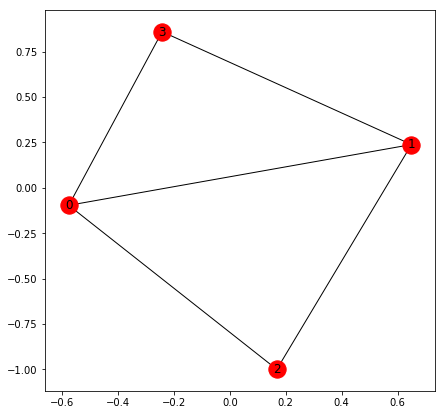

In [42]:
from utils import random_graph, draw_graph, draw_path
# random_graph(N,E) genera un grafo aleatorio con N vértices y E aristas.
#                   Podéis asumir que los ids de los nodos serán enteros del 0 a N-1
# draw_graph(G,s) dibuja el grafo G, el parámetro opcional s indica el tamaño del dibujo.
# draw_path(G,p,s) igual que draw_graph pero destacando las aristas que forman el path.

# Prueba aquí tu algoritmo.

G = random_graph(4,5)
draw_graph(G)
floyd_warshall(G)


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

<ul>
    <li>Analiza la complejidad del algoritmo.</li>
</ul>